In [54]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import transport_equation
import model
from common import cosmology, constants, util

In [2]:
model = reload(model)

In [3]:
# 5min 13s

In [4]:
# choose parameter "equivalent" to the paper
T_osc = 1e13
T_dec = 1e11
T_RH = 1e15
m_a = 2 * cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_osc))
decay_rate = 0 # cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_dec))

In [5]:
m = model.AxionBaryogenesisModel(transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                     axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
# res = model.start(m, T_RH, (1, 0), T_end=1.672894e+11) 
res = model.start(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass)

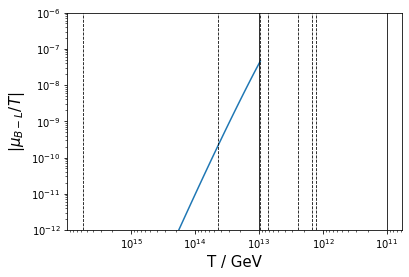

In [6]:
plt.loglog(res.T, -res.red_chem_B_minus_L)
plt.ylim(1e-12, 1e-6)
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$|\mu_{B - L} / T|$", fontsize=15)
plt.axvline(T_osc, color="black", lw=0.8)
plt.axvline(T_dec, color="black", lw=0.8)
for T in model.T_eqs: plt.axvline(T, ls="--", color="black", lw=.8)
#plt.axvline(T_end, color="red")

Text(0, 0.5, '$\\dot{\\theta} / T$')

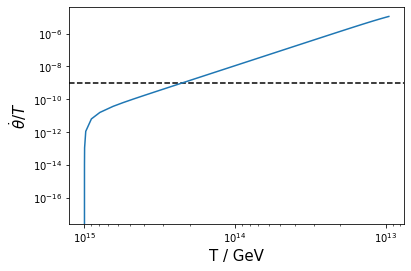

In [7]:
plt.axhline(1e-9, color="black", ls="--")
plt.loglog(res.T, np.abs(res.axion[1] / res.T))
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$\dot{\theta} / T$", fontsize=15)

In [8]:
%%time
eta_B, red_chem_pot_B_minus_L, T, (theta, theta_dot) = model.solve_to_end(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass, debug=True)

delta: 2.000000e+00 0.0 -4.594207172345703e-08
T: 9.540625e+12
delta: 1.613763e+00 -4.594207172345703e-08 -4.298495831100286e-07
T: 1.250680e+12
delta: 7.822832e-03 -4.2633972340282446e-07 -4.296880039533201e-07
CPU times: user 707 ms, sys: 66 µs, total: 707 ms
Wall time: 704 ms


In [9]:
import axion_decay

In [10]:
from scipy.integrate import solve_ivp
from common.rh_neutrino import calc_Gamma_a_SU2

In [11]:
f_a_range = np.geomspace(1e6, 1e18, 200)

In [12]:
decay_ratio = []
for f_a  in f_a_range:
    decay_rate = calc_Gamma_a_SU2(m_a, f_a)
    eta_B_after_decay = axion_decay.compute_axion_decay(T, red_chem_pot_B_minus_L, theta, theta_dot, m_a, f_a, decay_rate)
    decay_ratio.append(eta_B_after_decay / eta_B)

/home/jana/Documents/master-project/transport_eq/axion_decay.py:9: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/transport_eq/axion_decay.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/transport_eq/axion_decay.py:12: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


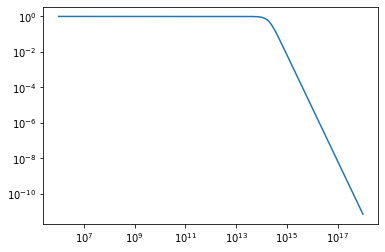

In [13]:
plt.loglog(f_a_range, decay_ratio)

In [14]:
import axion_leptogenesis.analysis
import axion_leptogenesis.model

In [15]:
H_inf = 2e10
f_a = 3e14

In [16]:
m_a_range = np.geomspace(1e6, 1e10, 30)
Gamma_phi_range = np.geomspace(1e6, 1e10, 31)

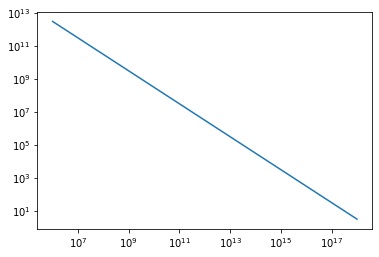

In [17]:
plt.loglog(f_a_range, [cosmology.calc_temperature(cosmology.calc_energy_density_from_hubble(calc_Gamma_a_SU2(m_a, f_a))) for f_a in f_a_range])

In [18]:
%%time
def f(m_a, Gamma_phi):
    print(m_a, Gamma_phi)
    try:
        decay_rate = calc_Gamma_a_SU2(m_a, f_a)
        m = model.AxionBaryogenesisModel(transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                         axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
        T_RH = cosmology.calc_reheating_temperature(Gamma_phi)
        return model.solve(m, T_RH, (1, 0), f_a, calc_axion_mass=axion_motion.calc_const_axion_mass)
    except ValueError:
        print("bad")
        raise
        return np.nan
        
eta_B_final_trans_eq = np.array([[f(m_a, Gamma_phi) for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])

1000000.0 1000000.0


/home/jana/Documents/master-project/transport_eq/axion_decay.py:9: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/transport_eq/axion_decay.py:12: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


2782559.402207126 1000000.0
7742636.826811277 1000000.0
21544346.900318824 1000000.0
59948425.03189409 1000000.0
166810053.72000557 1000000.0
464158883.3612773 1000000.0
1291549665.0148828 1000000.0
3593813663.8046255 1000000.0
10000000000.0 1000000.0
1000000.0 2511886.4315095823
2782559.402207126 2511886.4315095823
7742636.826811277 2511886.4315095823
21544346.900318824 2511886.4315095823
59948425.03189409 2511886.4315095823
166810053.72000557 2511886.4315095823
464158883.3612773 2511886.4315095823
1291549665.0148828 2511886.4315095823
3593813663.8046255 2511886.4315095823
10000000000.0 2511886.4315095823
1000000.0 6309573.44480193
2782559.402207126 6309573.44480193
7742636.826811277 6309573.44480193
21544346.900318824 6309573.44480193
59948425.03189409 6309573.44480193
166810053.72000557 6309573.44480193
464158883.3612773 6309573.44480193
1291549665.0148828 6309573.44480193
3593813663.8046255 6309573.44480193
10000000000.0 6309573.44480193
1000000.0 15848931.924611142
2782559.4022071

In [26]:
%%time
eta_B_final_schmitz = np.array([[axion_leptogenesis.model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf) for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])

../axion_leptogenesis/model.py:193: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
../axion_leptogenesis/model.py:197: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
../axion_leptogenesis/model.py:197: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


CPU times: user 30.5 s, sys: 0 ns, total: 30.5 s
Wall time: 30.5 s


In [45]:
levels = np.hstack([np.arange(np.floor(np.log10(min(np.min(eta_B_final_schmitz), np.min(eta_B_final_trans_eq)))), 
          np.ceil(np.log10(max(np.max(eta_B_final_schmitz), np.max(eta_B_final_trans_eq)))),
          1), np.log10(constants.eta_B_observed)])
levels.sort()

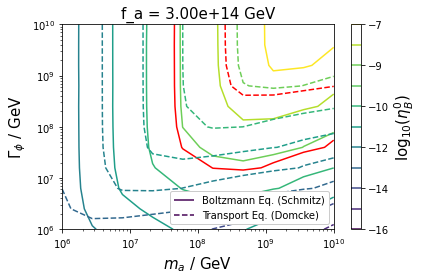

In [62]:
plt.title(f"f_a = {f_a:.2e} GeV", fontsize=15)
CS = plt.contour(m_a_range, Gamma_phi_range, np.log10(eta_B_final_schmitz), levels)
plt.colorbar().set_label(r"$\log_{10} (\eta_B^0)$", fontsize=15)
CS.collections[np.where(CS.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

CS2 = plt.contour(m_a_range, Gamma_phi_range, np.log10(eta_B_final_trans_eq), levels, linestyles="--")
CS2.collections[np.where(CS2.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

plt.xscale("log"); plt.yscale("log")
plt.xlabel("$m_a$ / GeV", fontsize=15)
plt.ylabel(r"$\Gamma_\phi$ / GeV", fontsize=15)
plt.tight_layout()

h1,_ = CS.legend_elements()
h2,_ = CS2.legend_elements()
plt.legend([h1[0], h2[0]], ["Boltzmann Eq. (Schmitz)", "Transport Eq. (Domcke)"], framealpha=1.0, loc=4)

plt.savefig(util.make_plot_path("bolzmann_schmitz_vs_transport_eq_domke.pdf"))